In [86]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from collections import Counter

# Load library
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# download the set of stop words the first time
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/cesleemontgomery/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/cesleemontgomery/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/cesleemontgomery/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


# 2.1B - EDA - Course Model (Udacity.com)

In [78]:
course_subs_DF = pd.read_csv('../../data/raw/videosubtitles_udacity/course_video_subtitles_udacity.csv')

### 1. Summary Statistics & Initial Impressions

#### 1.1 Size

In [3]:
course_subs_DF.shape

(30, 2)

Should be cognizant that there are 30 times fewer courses than academic interest to choose from.

#### 1.2 Visual Inspection

In [6]:
course_subs_DF.head(15)

,course_slug,subtitles
0,Artificial+Intelligence+for+Robotics+,P P Proportional \n \n\n\n tau \n\n \n \...
1,High Performance Computing,Consider this network\nI have a bunch of quest...
2,"Computability, Complexity & Algorithms",Before moving on from this question of\nevalua...
3,Machine Learning,\n \n \n \n a b \n d \n\n d \n f g \n d \n\...
4,Database+Systems+Concepts+&+Design+,Sometimes tables are already indexed by the da...
5,Knowledge-Based AI_ Cognitive Systems,Many science textbooks in middle school or\nhi...
6,Educational Technology,When you think of\nassessments in education\ny...
7,Introduction to Operating Systems,To make things concrete\nlets look at a file s...
8,Computer Networking,Lets have another quiz on data centers So how ...
9,CSE+8803+Special+Topics_+Big+Data+,In the first lesson\nwe talked about big data ...


More post-processing cleaning will need to occur to make labels readable and subtitles usable.

### 2. Text Analytics

#### 2.1 Text Length and Std Deviation - treating all subs as single documents per course (so no need for stats)

In [8]:
(course_subs_DF.groupby('course_slug')['subtitles']
                    .apply(lambda x: np.mean(x.str.len()))
                    .reset_index(name='mean_len_subtitles')).head()

,course_slug,mean_len_subtitles
0,Advanced Operating Systems,1450274.0
1,Artificial Intelligence,1503674.0
2,Artificial+Intelligence+for+Robotics+,874577.0
3,CS 6340_ Software Analysis & Testing,436928.0
4,CSE+8803+Special+Topics_+Big+Data+,249508.0


As expected, lots of words per course.  Might possibly revisit keeping subtitles non-concatonated.

#### 2.2 Visually Inspecting Distribution of Article Lengths

In [62]:
tempseries = course_subs_DF['subtitles'].str.len()

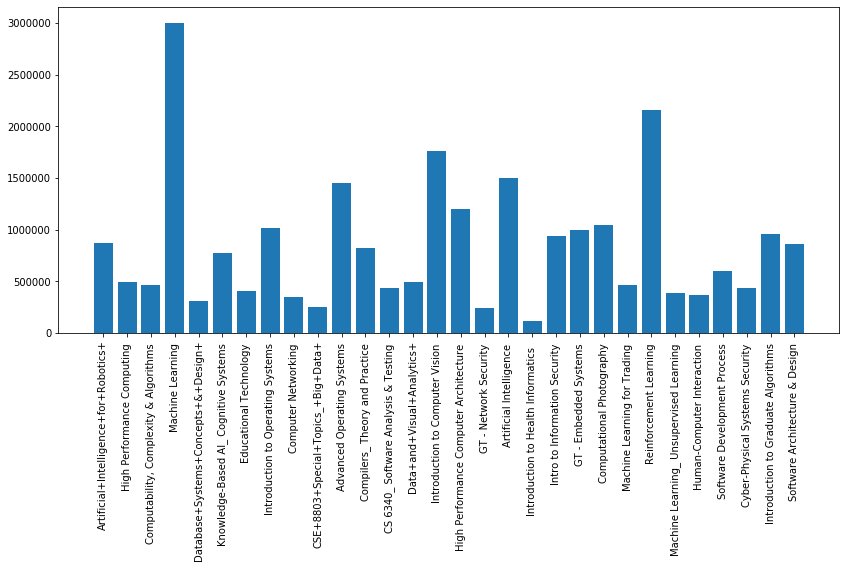

In [74]:
indexes = np.arange(len(aux))
fig, ax = plt.subplots(1, 1, figsize=(14, 6))
ax.bar(indexes, tempseries.values)
ax.set_xticks(indexes)
ax.set_xticklabels(course_subs_DF['course_slug'], rotation=90);

There clearly are a few outliers, but otherwise most courses have somewhat similar quantity of subtitles.  Outliers are probably due to multiple languages.  

### 3. Text Pre-Processing

#### 3.1 Lower, split/strip whitespace chars., remove stop words

In [75]:
# Building function for easy comparison
def get_counter_from_list(templist):

    #lowercase,remove punctuation and non-alpha, split whitespace
    templist = ''.join(templist).lower()
    templist = re.sub("[^a-zA-Z\s]+", "", templist).split()

    # Load stop words, lemmatizer
    stop_words = stopwords.words('english')
    lemma = nltk.wordnet.WordNetLemmatizer()

    # Remove stop words, lowercase, lemmatize
    counter = Counter([lemma.lemmatize(word.lower()) for word in templist if word not in stop_words])
    return counter

In [82]:
tempdf = course_subs_DF[course_subs_DF['course_slug'] == 'Machine Learning'].subtitles.values

print("Most Common Words in 'Machine Learning' course: \n")
for i in get_counter_from_list(tempdf).most_common(200): print(i)

Most Common Words in 'Machine Learning' course: 

('gtgt', 22014)
('que', 7955)
('de', 6329)
('e', 4809)
('um', 2830)
('voc', 2762)
('right', 2600)
('one', 2481)
('going', 2438)
('uma', 2319)
('x', 2292)
('isso', 2274)
('se', 2113)
('thats', 2005)
('para', 1941)
('like', 1898)
('em', 1872)
('okay', 1657)
('michael', 1561)
('well', 1507)
('know', 1469)
('ento', 1449)
('eu', 1422)
('thing', 1387)
('think', 1331)
('como', 1330)
('certo', 1329)
('ma', 1320)
('b', 1307)
('get', 1275)
('let', 1212)
('o', 1201)
('com', 1198)
('would', 1185)
('da', 1142)
('yeah', 1137)
('actually', 1128)
('mais', 1126)
('ou', 1100)
('kind', 1045)
('really', 1041)
('ser', 1002)
('way', 997)
('im', 980)
('n', 977)
('point', 973)
('laugh', 946)
('na', 939)
('por', 936)
('say', 914)
('make', 908)
('two', 861)
('could', 859)
('est', 858)
('bem', 854)
('mean', 841)
('youre', 817)
('there', 811)
('see', 793)
('want', 789)
('vamos', 786)
('fazer', 785)
('sim', 755)
('time', 755)
('sobre', 734)
('learning', 731)
('h', 

There's clearly less density of meaningful words here.  We may have to do more pre-processing (or supplement with other data sources) later to make the keywords more useful.

In [87]:
words = set(nltk.corpus.words.words())

In [108]:
# tempdf = "".join(course_subs_DF[course_subs_DF['course_slug'] == 'Machine Learning'].subtitles.values).lower()
" ".join(w for w in nltk.wordpunct_tokenize(str(course_subs_DF[course_subs_DF['course_slug'] == 'Machine Learning'].subtitles.values)) \
         if w.lower() in words)[0:10000]

'a b n d n n d n f g n d n n a g n n n n n n n n n n n n n n n n n n n n n n n n K n n n K n n n n n K n n n n n n n n K n n n n n n k n k n k k K n n n n n n n n n n n n n n n n n n n n n n n n n n LAUGH n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n LAUGH n n n n n n n n n n n dar um na de dar um n um na da no de o eu a fundamental da de no nE sero E das se eu o valor de no o valor da Mas no O so so valor das e de so de linear e o de de no n as do de so de das um um e na Web Um se de de O o de de nome da de se do da de para mim No eu v a de mas se um de em em algum Hum E ser so Hum E de a n para e tempo as de O de e um tempo dos E na o a mim O na mim e o No me de volume um no ser um dos e no testes ser se as so as so os no Mas o os So os e o Agora se em o na e a do no to linear em o os ne um so de de de as um na linear de de se eu ne o mas eu no do um do do Mas eu a de da E das de e em linear o a para s para um real na We

Looks somewhat better.  Let's update the pre-processor.

In [110]:
# Building function for easy comparison
def get_counter_from_list(templist, words):

    #lowercase,remove punctuation and non-alpha, split whitespace
    templist = " ".join(w for w in nltk.wordpunct_tokenize(str(templist)) \
         if w.lower() in words).lower()
    templist = re.sub("[^a-zA-Z\s]+", "", templist).split()

    # Load stop words, lemmatizer
    stop_words = stopwords.words('english')
    lemma = nltk.wordnet.WordNetLemmatizer()

    # Remove stop words, lowercase, lemmatize
    counter = Counter([lemma.lemmatize(word.lower()) for word in templist if word not in stop_words])
    return counter

In [111]:
tempdf = course_subs_DF[course_subs_DF['course_slug'] == 'Machine Learning'].subtitles.values
words = set(nltk.corpus.words.words())

print("Most Common Words in 'Machine Learning' course: \n")
for i in get_counter_from_list(tempdf, words).most_common(200): print(i)

Most Common Words in 'Machine Learning' course: 

('n', 47391)
('de', 5564)
('e', 3504)
('um', 2542)
('right', 2475)
('going', 2238)
('na', 2214)
('one', 2083)
('thats', 1864)
('x', 1862)
('like', 1730)
('se', 1654)
('para', 1469)
('em', 1467)
('well', 1410)
('know', 1342)
('ne', 1304)
('think', 1252)
('eu', 1146)
('b', 1138)
('yeah', 1113)
('would', 1102)
('o', 1046)
('actually', 1027)
('get', 984)
('da', 973)
('really', 942)
('way', 912)
('laugh', 907)
('kind', 897)
('ser', 894)
('ma', 831)
('could', 804)
('two', 786)
('see', 747)
('say', 726)
('want', 717)
('there', 708)
('time', 696)
('good', 688)
('thing', 676)
('learning', 666)
('dont', 662)
('data', 659)
('go', 655)
('h', 594)
('zero', 580)
('make', 567)
('case', 561)
('something', 547)
('exactly', 544)
('u', 544)
('little', 543)
('probability', 543)
('point', 528)
('hypothesis', 505)
('sense', 504)
('set', 504)
('mean', 466)
('particular', 462)
('different', 461)
('function', 456)
('q', 455)
('got', 452)
('sort', 452)
('fact', 

Better than before! Hopefully term frequency measures employed (ex. TF-IDF) help account for the popularity of useless words or more pre-processing will be needed.

### 4. Takeaways

- Data looks good given quality checks, but lots of useless words highly frequent with fewer important keywords rising to the top.
    - Import looks correct.
    - Syllabi or udacity course homepages may be better corpus.

### 5. Future Directions

#### 5.0 Bug Fixes
    - NA
#### 5.1 More Pre-Processing
    - Include and highly weight syllabus for example.